In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm

In [4]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


In [284]:
gene_symbols = data["gene-symbol"].values

In [272]:
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3
...,...,...,...,...,...,...,...,...,...
1018,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4
1020,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1
1021,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

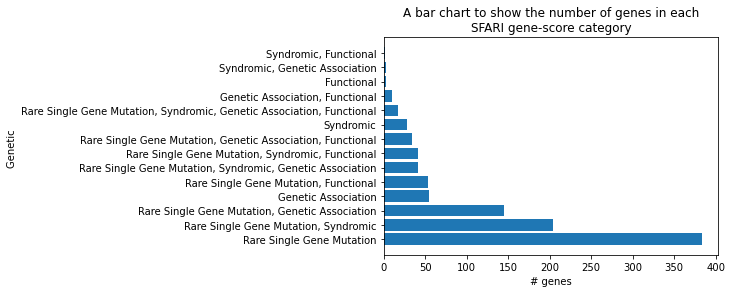

In [5]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

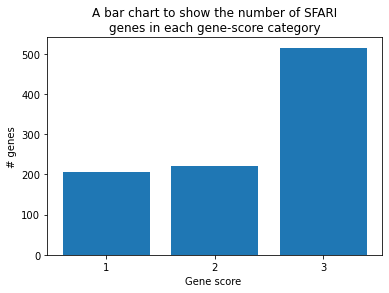

In [65]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

In [61]:
gene_cat_vals

array([ 3.,  2.,  1., nan])

['1', '2', '3', 'NaN']


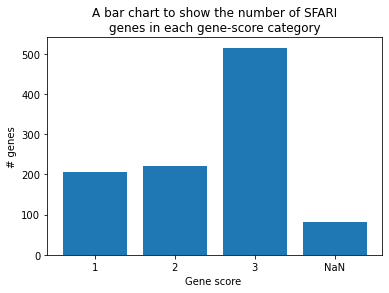

In [287]:
gene_cats_data = data.sort_values("gene-score")['gene-score']
gene_cat_vals = gene_cats_data.unique()
gene_cat_counts = []
for g in gene_cat_vals:
    if np.isnan(g):
        score_indexes = gene_cats_data[gene_cats_data.isnull()].index
    else:
        score_indexes = gene_cats_data[gene_cats_data == g].index
    gene_cat_counts.append(score_indexes.size)
    

A, B = gene_cat_vals.size, len(gene_cat_counts)
assert(A == B)

ticks = np.arange(gene_cat_vals.size)
tick_vals = ["1", "2", "3", "NaN"]#[str(int(val)) for val in gene_cat_vals]
print(tick_vals)

fig = plt.figure()
plt.bar(ticks, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(ticks, tick_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1-v2.pdf', dpi=fig.dpi)

# task 2

In [157]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [118]:
gs = data["gene-symbol"]
data.iloc[gs[gs == "RP11-1407O15.2"].index[0]]

status                                       9
gene-symbol                     RP11-1407O15.2
gene-name                                  NaN
ensembl-id                                 NaN
chromosome                                  17
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            1
Name: 771, dtype: object

In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

In [ ]:
# This task was completed manually

# task 4

In [229]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [ ]:
# Getting gene-names and ensemblIDs for the above genes^

In [285]:
gs = data["gene-symbol"]
ensembls = []
names = []

for g in gene_symbols:
    idx = gs[gs == g].index[0]
    ensembls.append(data["ensembl-id"].iloc[idx])
    names.append(data["gene-name"].iloc[idx])

In [ ]:
# load data manually from CSVs

In [83]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [84]:
year_data2 = []
#citation_data = []
#pmids = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())
    #citation_data.append(gene_data["Citation"].values.size)
    #pmids.append(gene_data["PMID"].values.tolist())

In [85]:
gene_data["Citation"]

0     Epilepsia. 2019 Dec;60 Suppl 3:S17-S24. doi: 1...
1     Neuron. 2020 May 6;106(3):421-437.e11. doi: 10...
2     Nature. 2012 Apr 4;485(7397):246-50. doi: 10.1...
3     Nature. 2012 Sep 20;489(7416):385-90. doi: 10....
4     Nat Genet. 2011 Jun;43(6):585-9. doi: 10.1038/...
                            ...                        
63    Pract Neurol. 2017 Aug;17(4):314-317. doi: 10....
64    J Pediatr Neurosci. 2012 May;7(2):123-5. doi: ...
65    J Neurosci. 2004 Mar 17;24(11):2690-8. doi: 10...
66    Gene. 2013 Dec 15;532(2):294-6. doi: 10.1016/j...
67    J Child Neurol. 2004 Aug;19(8):597-603. doi: 1...
Name: Citation, Length: 68, dtype: object

In [ ]:
# load data dynamically from NCBI

In [165]:
for i in tqdm(gene_symbols):
    i

100%|██████████████████████████████████| 1023/1023 [00:00<00:00, 5138650.29it/s]


In [ ]:
Entrez.email = "s1803764@ed.ac.uk"
#all_gene_dates = []

for j, g in tqdm(enumerate(gene_symbols[996:])):
    idx = j + 996
    print(idx)
    handle = Entrez.esearch(db="pubmed",retmax=10000, term=f"({g}[TW] OR {names[idx]}[TW] OR {ensembls[idx]}[TW]) AND (autism[MH] OR autistic[MH] OR ASD[TW] OR \"autism spectrum disorder\"[TW] OR \"pervasive developmental disorder\"[TW] OR PDD-NOS[TW] OR PDD[TW] OR asperger[MH])")
    record = Entrez.read(handle)
    ids = list(set(record["IdList"]))
    #print(record["ErrorList"]["PhraseNotFound"])

    dates = []
    for i in tqdm(ids):
        handle2 = Entrez.esummary(db="pubmed", retmax=10000, id=i)
        meta_data = Entrez.read(handle2)[0]
        #print(meta_data["PubDate"])
        #print(meta_data["Title"])
        dates.append(meta_data["PubDate"][0:4])

    all_gene_dates.append(dates)
    #all_gene_dates[j] = dates

0it [00:00, ?it/s]

996



  3%|█                                        | 96/3528 [00:57<32:56,  1.74it/s]


  5%|██▏                                     | 193/3528 [01:55<37:47,  1.47it/s]


  8%|███▎                                    | 290/3528 [02:53<30:12,  1.79it/s]


 11%|████▍                                   | 387/3528 [03:50<30:48,  1.70it/s]


 14%|█████▍                                  | 484/3528 [04:47<29:15,  1.73it/s]


 16%|██████▌                                 | 581/3528 [05:45<27:49,  1.77it/s]


 19%|███████▋                                | 678/3528 [06:46<28:34,  1.66it/s]


 22%|████████▊                               | 775/3528 [07:47<27:04,  1.70it/s]


 25%|█████████▉                              | 872/3528 [08:46<25:19,  1.75it/s]


 27%|██████████▉                             | 969/3528 [09:46<25:29,  1.67it/s]


 30%|███████████▊                           | 1066/3528 [10:45<23:37,  1.74it/s]


 33%|████████████▊                          | 1163/3528 [11:47<24:46,  1.59it/s]


 36%|█████████████▉                         | 1260/3528 [12:45<21:37,  1.75it/s]


 38%|███████████████                        | 1357/3528 [13:42<20:54,  1.73it/s]


 41%|████████████████                       | 1454/3528 [14:40<19:54,  1.74it/s]


 44%|█████████████████▏                     | 1551/3528 [15:38<20:05,  1.64it/s]


 47%|██████████████████▏                    | 1648/3528 [16:42<18:57,  1.65it/s]


 49%|███████████████████▎                   | 1745/3528 [17:40<17:30,  1.70it/s]


 52%|████████████████████▎                  | 1842/3528 [18:36<16:43,  1.68it/s]


 55%|█████████████████████▍                 | 1939/3528 [19:33<15:37,  1.70it/s]


 58%|██████████████████████▌                | 2036/3528 [20:31<15:03,  1.65it/s]


 60%|███████████████████████▌               | 2133/3528 [21:29<13:33,  1.71it/s]


 63%|████████████████████████▋              | 2230/3528 [22:27<12:59,  1.66it/s]


 66%|█████████████████████████▋             | 2327/3528 [23:24<11:48,  1.69it/s]


 69%|██████████████████████████▊            | 2424/3528 [24:22<10:52,  1.69it/s]


 71%|███████████████████████████▊           | 2521/3528 [25:20<10:05,  1.66it/s]


 73%|████████████████████████████▍          | 2571/3528 [25:50<09:29,  1.68it/s]

In [293]:
len(all_gene_dates)

996

In [233]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_dates[i]) < min_date:
            min_date = np.min(all_dates[i])
    print()
print(min_date)

NRXN1
119
Counter({'2019': 15, '2012': 12, '2021': 10, '2015': 10, '2014': 10, '2013': 10, '2009': 10, '2020': 8, '2011': 8, '2018': 7, '2017': 5, '2008': 5, '2010': 4, '2016': 3, '2007': 1, '2004': 1})

SHANK3
331
Counter({'2021': 49, '2020': 44, '2019': 39, '2018': 38, '2016': 31, '2017': 29, '2015': 22, '2014': 21, '2011': 13, '2013': 12, '2012': 12, '2009': 8, '2008': 5, '2007': 4, '2010': 2, '1993': 1, '2005': 1})

MECP2
261
Counter({'2016': 29, '2011': 21, '2019': 18, '2014': 18, '2017': 17, '2020': 16, '2015': 14, '2012': 14, '2018': 13, '2010': 13, '2009': 13, '2021': 12, '2013': 12, '2008': 12, '2007': 11, '2005': 8, '2004': 5, '2003': 5, '2006': 4, '2002': 2, '2000': 2, '1993': 1, '2001': 1})

SCN2A
64
Counter({'2021': 14, '2019': 13, '2020': 8, '2018': 6, '2017': 5, '2016': 5, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2004': 2, '2012': 1, '2010': 1, '2003': 1})

SCN1A
40
Counter({'2021': 7, '2020': 5, '2012': 5, '2019': 4, '2018': 4, '2013': 3, '2016': 2, '2015': 2, '2004

In [275]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_gene_dates):
    all_gene_dates[i] = list(map(int, el))
    print(gene_symbols[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_gene_dates[i]) < min_date:
            min_date = np.min(all_gene_dates[i])
    print()
print(min_date)

ABAT
4
Counter({2018: 1, 2017: 1, 2012: 1, 2005: 1})

ABCA10
0
Counter()

ABCA13
4
Counter({2018: 2, 2020: 1, 2016: 1})

ABCA7
0
Counter()

ACE
24
Counter({2021: 5, 2020: 5, 2019: 3, 2016: 2, 2014: 2, 2010: 2, 2018: 1, 2017: 1, 2015: 1, 2012: 1, 1998: 1})

ACHE
0
Counter()

ACTB
2
Counter({2019: 1, 2016: 1})

ACTL6B
5
Counter({2020: 2, 2019: 1, 2017: 1, 2014: 1})

ACTN4
1
Counter({2018: 1})

ACY1
1
Counter({2010: 1})

ADA
13
Counter({2013: 3, 2019: 2, 2020: 1, 2011: 1, 2008: 1, 2004: 1, 2002: 1, 2001: 1, 2000: 1, 1982: 1})

ADCY3
1
Counter({2019: 1})

ADCY5
1
Counter({2017: 1})

ADK
0
Counter()

ADNP
42
Counter({2021: 7, 2020: 7, 2019: 7, 2018: 7, 2017: 4, 2016: 4, 2015: 3, 2014: 2, 1993: 1})

ADORA3
2
Counter({2013: 1, 2011: 1})

ADSL
47
Counter({2013: 6, 2012: 5, 1989: 4, 2021: 3, 2015: 3, 2000: 3, 2020: 2, 2017: 2, 2011: 2, 2004: 2, 1986: 2, 2019: 1, 2018: 1, 2016: 1, 2014: 1, 2010: 1, 2009: 1, 2008: 1, 2005: 1, 1999: 1, 1996: 1, 1995: 1, 1992: 1, 1984: 1})

AFF2
9
Counter({2018: 2,

In [276]:
# get best 10 genes (based on literature)
top10 = np.zeros((10,2))

for i, el in tqdm(enumerate(all_gene_dates)):
    num = len(el)
    for j in range(top10.shape[0]):
        if num > top10[j, 0]:
            for k in range(j+1, top10.shape[0]):
                top10[k, :] = top10[k-1, :]
            
            top10[j, 0] = num
            top10[j, 1] = i
            
            
                
print(top10)
print(top10_idx)

1023it [00:00, 310858.00it/s]

[[3528.  996.]
 [ 700.  921.]
 [ 218.  541.]
 [ 148.  626.]
 [ 119.  596.]
 [  96.  938.]
 [  94.  811.]
 [  90.  932.]
 [  87.  947.]
 [  27.  906.]]
[1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022]


In [277]:
genes = []
gene_idxs = []
new_years = []

for i in range(top10.shape[0]):
    idx = int(top10[i, 1])
    print(gene_symbols[idx])
    genes.append(gene_symbols[idx])
    gene_idxs.append(idx)
    new_years.append(all_gene_dates[idx])

YY1
TEK
MTOR
OXTR
NRXN1
TSC2
SHANK2
TRIO
UBE3A
TCF4


In [152]:
from collections import Counter

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    print()

NRXN1
76
Counter({'2019': 9, '2012': 9, '2015': 7, '2013': 7, '2009': 7, '2021': 6, '2014': 6, '2011': 6, '2020': 5, '2017': 4, '2018': 2, '2016': 2, '2010': 2, '2008': 2, '2007': 1, '2004': 1})

SHANK3
216
Counter({'2020': 29, '2018': 26, '2019': 20, '2021': 19, '2017': 19, '2016': 19, '2015': 17, '2014': 17, '2013': 12, '2011': 11, '2012': 9, '2009': 8, '2008': 4, '2010': 3, '2007': 3})

MECP2
148
Counter({'2016': 14, '2015': 12, '2013': 11, '2011': 10, '2020': 9, '2017': 9, '2019': 8, '2014': 8, '2009': 8, '2021': 7, '2008': 7, '2005': 7, '2018': 6, '2012': 6, '2010': 5, '2007': 5, '2004': 4, '2003': 4, '2006': 3, '2002': 2, '2000': 2, '2001': 1})

SCN2A
41
Counter({'2021': 7, '2019': 6, '2017': 5, '2020': 4, '2018': 4, '2016': 3, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2012': 1, '2010': 1, '2004': 1, '2003': 1})

SCN1A
19
Counter({'2018': 3, '2012': 3, '2020': 2, '2013': 2, '2021': 1, '2019': 1, '2016': 1, '2015': 1, '2011': 1, '2009': 1, '2008': 1, '2004': 1, '2003': 1})



# Task 5

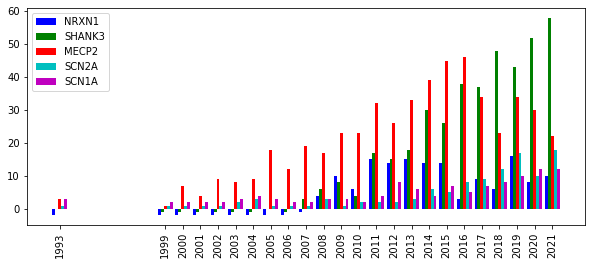

In [14]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

Text(0, 0.5, '# papers published')

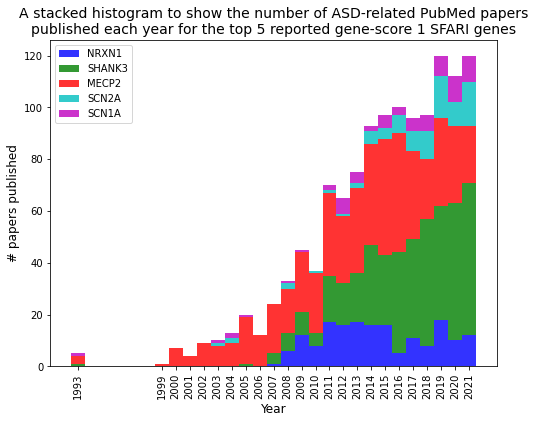

In [96]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=0, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [ ]:
# EXTENSION: plot citations too

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

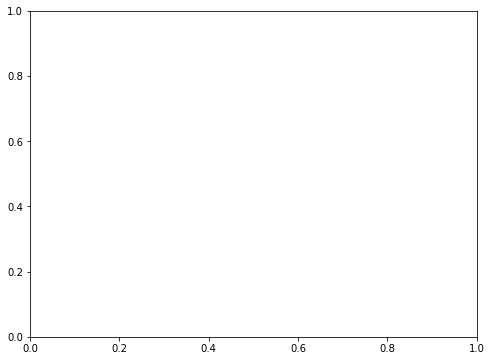

In [41]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(citation_data, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [115]:
Entrez.email = "s1803764@ed.ac.uk"
num_pubs = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=2000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    num_pubs.append(len(record["IdList"]))

100%|███████████████████████████████████████| 1023/1023 [10:29<00:00,  1.63it/s]


Text(0, 0.5, '# papers published')

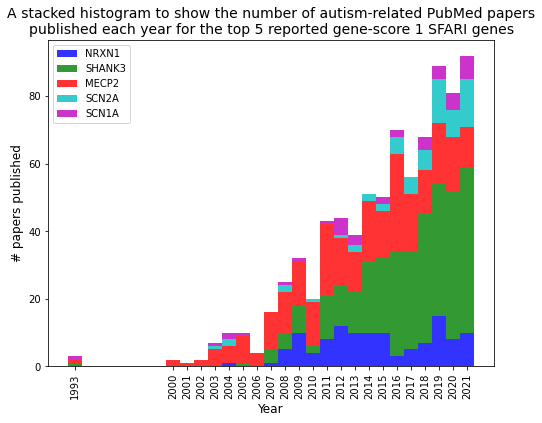

In [254]:
years = np.arange(2000,2022)
year_labels = np.insert(years, 0, 1993)
year_range = np.arange(1993,2023)
n_bins = year_labels.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(all_dates, year_range, density=0, histtype="bar", stacked=True, color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(year_labels+0.5, year_labels, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

Text(0, 0.5, '# papers published')

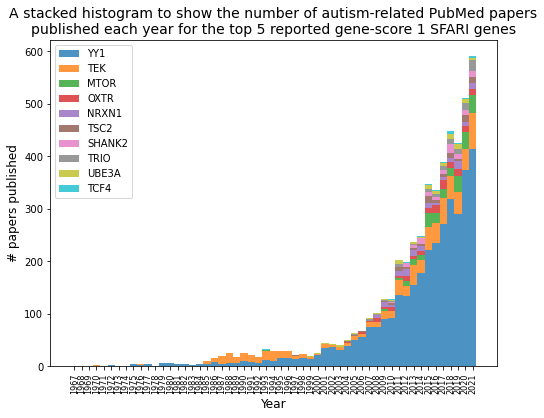

In [281]:
years = np.arange(1967,2022,1)
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(new_years, range(1967,2023), density=0, histtype="bar", stacked=True, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90, fontsize=8)
plt.title("A stacked histogram to show the 10 SFARI genes with the highest number of autism-related PubMed articles published each year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [283]:
data.iloc[996]

status                                                              9
gene-symbol                                                       YY1
gene-name                                     YY1transcription factor
ensembl-id                                            ENSG00000100811
chromosome                                                         14
genetic-category     Rare Single Gene Mutation, Syndromic, Functional
gene-score                                                        NaN
syndromic                                                           1
number-of-reports                                                   5
Name: 996, dtype: object